# Testing VAE with Single Point Dataset

## Testing Convolutional Autoencoder (CAE)

In [1]:
from autoencoders.CAE import CAECoordConv as CAE
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
dataset, validation = generate_single_point(16, 16, validation_split=0.20)
INPUT_SHAPE = dataset.shape[1:]
DATASET_SIZE = dataset.shape[0]
VALIDATION_SIZE = validation.shape[0]
print(dataset.shape)
print(validation.shape)

(205, 16, 16, 1)
(51, 16, 16, 1)


In [4]:
cae = CAE(
    layers=3,
    input_shape=INPUT_SHAPE,
    latent_size=8,
    filters=32,
    kernel_size=3,
    name="VAE")
cae.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 16, 16, 1)]       0         
_________________________________________________________________
conv1_enc (Conv2D)           (None, 16, 16, 32)        320       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 8, 8, 32)          0         
_________________________________________________________________
conv2_enc (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 4, 4, 64)          0         
_________________________________________________________________
conv3_enc (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 2, 2, 128)         0   

In [5]:
callbacks = [
    #EarlyStopping(monitor='val_ball_track_metric', patience=60)
]

batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

history = cae.train_primitive(
    dataset, 
    validation, 
    epochs=200,
    batch_size=batch_size,
    callbacks=callbacks
)

0.0628 - val_ball_track_metric: 5.4084
Epoch 77/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0161 - ball_track_metric: 4.6158 - val_loss: 0.0633 - val_ball_track_metric: 5.2445
Epoch 78/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0155 - ball_track_metric: 4.3668 - val_loss: 0.0664 - val_ball_track_metric: 5.0769
Epoch 79/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0151 - ball_track_metric: 4.2219 - val_loss: 0.0702 - val_ball_track_metric: 5.0182
Epoch 80/200
7/7 [==============================] - 0s 35ms/step - loss: 0.0146 - ball_track_metric: 4.0686 - val_loss: 0.0748 - val_ball_track_metric: 4.8060
Epoch 81/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0144 - ball_track_metric: 3.8557 - val_loss: 0.0807 - val_ball_track_metric: 4.7138
Epoch 82/200
7/7 [==============================] - 0s 33ms/step - loss: 0.0136 - ball_track_metric: 3.6735 - val_loss: 0.0847 - val_ball_track_metric: 4.6017
Epoch 8

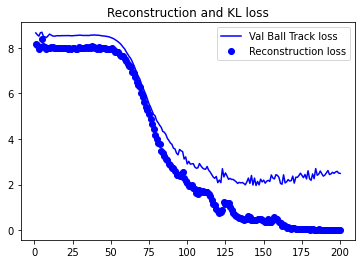

In [6]:
val_rec_loss = history.history['val_ball_track_metric']
rec_loss = history.history['ball_track_metric']

epochs = range(1, len(val_rec_loss) + 1)    

plt.plot(epochs, val_rec_loss, 'b', label='Val Ball Track loss')
plt.plot(epochs, rec_loss, 'bo', label='Reconstruction loss')
plt.title('Reconstruction and KL loss')
plt.legend()

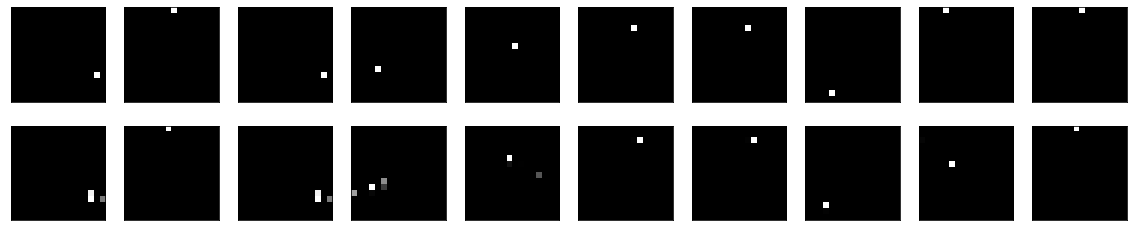

In [7]:
import random
import numpy as np

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, VALIDATION_SIZE-1)
    images[i] = validation[rand_img]

decoded_imgs = cae.predict(images)
#latent = vae.encoder.predict(images)

#decoded_imgs = vae.decoder.predict(latent[:][2])

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()